In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image = cv2.imread('D:/FYP/periappical/img1.png',0)
plt.imshow(image,cmap='gray')

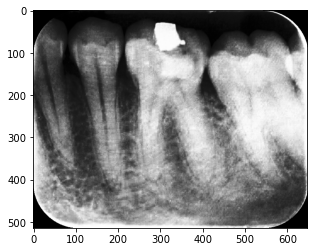

In [3]:
gray_img_eqhist=cv2.equalizeHist(image)
plt.imshow(gray_img_eqhist,cmap='gray')

In [ ]:
img = gray_img_eqhist
original = img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(img, table)
cv2.imshow("original", original)
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
median = cv2.medianBlur(gray_img_eqhist,5)

In [ ]:
plt.imshow(median,cmap='gray')

In [ ]:
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
plt.imshow(gray_img_clahe,cmap='gray')

In [ ]:
denoise = cv2.fastNlMeansDenoising(gray_img_clahe,None,10,7,21)
plt.imshow(denoise,cmap='gray')

In [ ]:
img1 = denoise
# Creating our sharpening filter
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv2.filter2D function on our Cybertruck image
sharpen_img_1=cv2.filter2D(img1,-1,filter)
plt.imshow(sharpen_img_1,cmap='gray')

In [ ]:
img = sharpen_img_1
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.imshow(res2,cmap='gray')